#2

##(a)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')
import os
os.chdir('/content/gdrive/My Drive/')
from google.colab import files

Mounted at /content/gdrive/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
training_data = pd.read_csv("./titanic/train.csv")
testing_data = pd.read_csv("./titanic/test.csv")


##(b)

###Process training data

In [4]:
#Check if there is missing data in the dataset
training_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the missing "Age" data



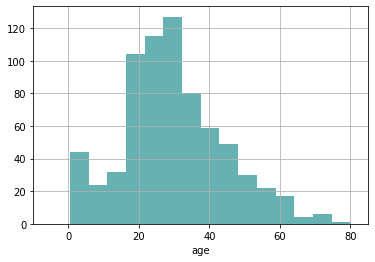

In [5]:
ax = training_data["Age"].hist(bins=15, color='teal', alpha=0.6)
ax.set(xlabel='age')
plt.xlim(-10,85)
plt.show()

In [6]:
# choose to use the median to fill in missing data, since the skewness is not 0
print('The mean of "Age" is %.2f' %(training_data["Age"].mean(skipna=True)))
print('The median of "Age" is %.2f' %(training_data["Age"].median(skipna=True)))
new_data = training_data.copy()
new_data["Age"].fillna(training_data["Age"].median(skipna=True), inplace=True)

The mean of "Age" is 29.70
The median of "Age" is 28.00


Remove the "Cabin" feature

In [7]:
new_data.drop('Cabin', axis=1, inplace=True)

Handling the missing "Embarked" data

In [8]:
#Find the most common "Embarked" categories
training_data["Embarked"].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
new_data["Embarked"].fillna("S", inplace=True)

Check the final dataset

In [10]:
new_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Precess other features

In [11]:
new_data.drop('Name', axis=1, inplace=True)
new_data.drop('Ticket', axis=1, inplace=True)

new_data = pd.get_dummies(new_data, columns=["Embarked","Sex"])
new_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1


###Process test data

In [12]:
#check if there is missing data in testing set
testing_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Handling the missing "Age data"

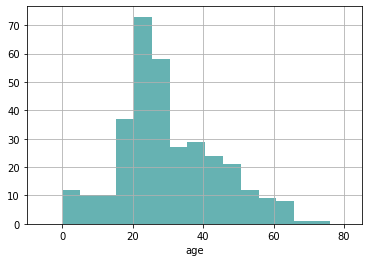

In [13]:
ax = testing_data["Age"].hist(bins=15, color='teal', alpha=0.6)
ax.set(xlabel='age')
plt.xlim(-10,85)
plt.show()

In [14]:
print('The mean of "Age" is %.2f' %(testing_data["Age"].mean(skipna=True)))
print('The median of "Age" is %.2f' %(testing_data["Age"].median(skipna=True)))
new_test = testing_data.copy()
new_test["Age"].fillna(testing_data["Age"].median(skipna=True), inplace=True)

The mean of "Age" is 30.27
The median of "Age" is 27.00


Remove the "Cabin" feature

In [15]:
new_test.drop('Cabin', axis=1, inplace=True)

Handling the missing "Embarked" data

In [16]:
#Find the most common "Embarked" categories
testing_data["Embarked"].value_counts()


S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [17]:
new_test["Embarked"].fillna("S", inplace=True)

Handling the missing "Fare" data

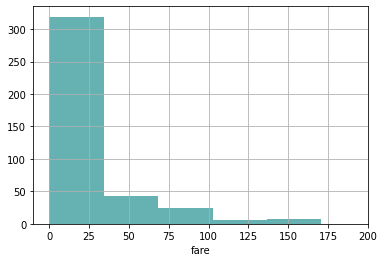

In [18]:
ax = testing_data["Fare"].hist(bins=15, color='teal', alpha=0.6)
ax.set(xlabel='fare')
plt.xlim(-10,200)
plt.show()

In [19]:
print('The mean of "Fare" is %.2f' %(testing_data["Fare"].mean(skipna=True)))
print('The median of "Fare" is %.2f' %(testing_data["Fare"].median(skipna=True)))

new_test["Fare"].fillna(testing_data["Fare"].median(skipna=True), inplace=True)

The mean of "Fare" is 35.63
The median of "Fare" is 14.45


Check the final testing set

In [20]:
new_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
new_test.drop('Name', axis=1, inplace=True)
new_test.drop('Ticket', axis=1, inplace=True)

new_test = pd.get_dummies(new_test, columns=["Embarked","Sex"])
new_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,3,34.5,0,0,7.8292,0,1,0,0,1
1,893,3,47.0,1,0,7.0000,0,0,1,1,0
2,894,2,62.0,0,0,9.6875,0,1,0,0,1
3,895,3,27.0,0,0,8.6625,0,0,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1,1,0


###Logistic regression

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = new_data[['Pclass','Age','SibSp','Parch','Fare','Embarked_C','Embarked_Q','Embarked_S','Sex_female','Sex_male']]
Y = new_data['Survived']

X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=1)
classifier = LogisticRegression(max_iter=5000)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
print(classifier.score(X_test,Y_test))


0.7988826815642458

##(c)

###Using all of the training data

In [27]:
new_classifier = LogisticRegression(max_iter=5000)
new_classifier.fit(X,Y)
X_test = new_test[['Pclass','Age','SibSp','Parch','Fare','Embarked_C','Embarked_Q','Embarked_S','Sex_female','Sex_male']]
Y_pred = classifier.predict(X_test)


result = pd.DataFrame({'PassengerId':new_test['PassengerId'],'Survived':Y_pred})
result.head()
result.to_csv('./titanic/predict_result.csv',index=False)